In [1]:
# Say hello
println("hello world")

hello world


In [2]:
# A basic function
# Syntax is 
# function NAME(args)
#      :
# end
# 
# can use return to set return values, by default return is last statement executed.

# function to calculate the volume of a sphere
function sphere_vol(r)
    # julia allows Unicode names (in UTF-8 encoding)
    # so either "pi" or the symbol π can be used
    return 4/3*pi*r^3
end

vol = sphere_vol(3)

113.09733552923254

In [3]:
# Printf formats like C and python printf
# "using" is most common way to import a package
using Printf
@printf "volume = %0.3f\n" vol 

volume = 113.097


In [4]:
# New vol with a type
function sphere_vol(r::Float64)
    # julia allows Unicode names (in UTF-8 encoding)
    # so either "pi" or the symbol π can be used
    return 4/3*pi*r^3
end
# Now we have two methods

sphere_vol (generic function with 2 methods)

In [5]:
# Strings
s1 = "The quick brown fox jumps over the lazy dog α,β,γ"
println(s1)

# String interpolation uses $NAME to do substitution
verb="jumps"
s1 = "The quick brown fox $verb over the lazy dog α,β,γ"
println(s1)
verb="somersaults"
s1 = "The quick brown fox $verb over the lazy dog α,β,γ"
println(s1)
# Interpolation happens when variable is defined
verb="flies"
println(s1)

# Can take slices from strings
println(s1[end-10:end])

# Concatenation uses *
# Slices (and arrays) are 1 based
println(s1[1:end-10]*s1[end-9:end])

# Some useful string functions
println(strip("       hello     ")^3)
println(strip("       hello     ",['h',' '])^3) # Here ['h',' '] is an array, of characters
println(replace(s1,"somersaults" => "jumps"))   # Here "somersaults" => "jumps" is a Pair type

The quick brown fox jumps over the lazy dog α,β,γ
The quick brown fox jumps over the lazy dog α,β,γ
The quick brown fox somersaults over the lazy dog α,β,γ
The quick brown fox somersaults over the lazy dog α,β,γ
dog α,β,γ
The quick brown fox somersaults over the lazy dog α,β,γ
hellohellohello
elloelloello
The quick brown fox jumps over the lazy dog α,β,γ


In [6]:
# Arrays
# 1-d
a1d=[1,2,3]
println(summary(a1d)," ",a1d)           
println(summary(a1d[1])," ",a1d[1])       # One based indexing by default
println(summary(a1d[1:2])," ",a1d[1:2])   # Slices using : notation
println(summary(a1d[1:2])," ",a1d[1:2:3]) # Triple start:stride:end
# : Notation defines a range "iterator"
# collect() expands an iterator
println(summary(1:2:3)," ",collect(1:2:3) )
println(collect(4:2:20))

3-element Vector{Int64} [1, 2, 3]
Int64 1
2-element Vector{Int64} [1, 2]
2-element Vector{Int64} [1, 3]
2-element StepRange{Int64, Int64} [1, 3]
[4, 6, 8, 10, 12, 14, 16, 18, 20]


In [7]:
# Arrays can be defined from "comprehensions"
a1d=[i^3 for i = 1 : 5]
println(a1d)

[1, 8, 27, 64, 125]


In [8]:
# Arrays can hold many types
a1d=["a","b","c"]
println(summary(a1d)," ",a1d)
# and they can be generic typed
a1d=["a","b",1]
println(summary(a1d)," ",a1d)

3-element Vector{String} ["a", "b", "c"]
3-element Vector{Any} Any["a", "b", 1]


In [9]:
# Multi-dimensional array in one line
a3d=[i+j+k for i=1:2, j=1:3, k=1:2]
println(a3d)
println(size(a3d))
println(summary(a3d))

[3 4 5; 4 5 6]

[4 5 6; 5 6 7]
(2, 3, 2)
2×3×2 Array{Int64, 3}


In [10]:
# We can add arrays, including views defined by slices
println(a3d[:,:,1].+rand(1:100,2,3))
# But sizes need to match
try
  println(a3d[:,1,:].+rand(1:100,2,3))
catch(err)
  println(err)
end
# Types also need to match, can't change once created
try
  a3d[:,:,1]=rand(2,3)  # rand() returns Float64 in range [0,1) by default
catch(err)
  println(err)
end
println(summary(a3d))

[9 13 67; 57 56 25]
DimensionMismatch("arrays could not be broadcast to a common size; got a dimension with lengths 2 and 3")
InexactError(:Int64, Int64, 0.6979700944457785)
2×3×2 Array{Int64, 3}


In [11]:
# Dictionaries use => Pair symbol
d1d=Dict("a"=>1,"b"=>2)
println(summary(d1d)," ",d1d)
d1d=Dict( [i => @sprintf("%d",i) for i=1:10 ] )
println(summary(d1d)," ",d1d)
# Can get keys and values
println(collect(keys(d1d)))
println(collect(values(d1d)))
# Can iterate - get a set of Pairs
for v in d1d
    println(v.first," ",v.second)
end
# Can search
println(haskey(d1d,3))

Dict{String, Int64} with 2 entries Dict("b" => 2, "a" => 1)
Dict{Int64, String} with 10 entries Dict(5 => "5", 4 => "4", 6 => "6", 7 => "7", 2 => "2", 10 => "10", 9 => "9", 8 => "8", 3 => "3", 1 => "1")
[5, 4, 6, 7, 2, 10, 9, 8, 3, 1]
["5", "4", "6", "7", "2", "10", "9", "8", "3", "1"]
5 5
4 4
6 6
7 7
2 2
10 10
9 9
8 8
3 3
1 1
true


In [12]:
# Simple looping
for i in 1:5
    println(i)
end

1
2
3
4
5


In [13]:
# map for general generating of iterators
for i in map((x) -> x^2, 1:4)
    println(i)
end

1
4
9
16


In [14]:
# Conditionals 
if true
    println("It's true!")
else
    println("It's false!")
end

It's true!


In [15]:
# Ternary operator for conditional
1 > 2 ? println("that's true!") : println("that's false!")

that's false!


In [16]:
# Fun with symbols
a=2
println(√a)
println(2a)

1.4142135623730951
4


In [17]:
# Types. 
# Julia does a lot with types, a common errors is "no method matching ... for type ..., ... ,.... closest match is ....."
try 
    1+"s" 
catch err  
    println(err)
end

MethodError(+, (1, "s"), 0x00000000000073cf)


In [18]:
# Custom types
mutable struct Person
    name::AbstractString
    male::Bool
    age::Float64
    children::Int
end

p = Person("Julia", false, 4, 0)
println(summary(p)," ",p)

people = Person[]
push!(people, Person("Steve", true, 42, 0))
push!(people, Person("Jade", false, 17, 3))
println(summary(people)," ",people)

function printp(p::Person)
    println(summary(p)," ",p)
end
printp(p)
printp(1)
# On first encountering a call to a function with a particular argument type signature
# Julia interpreter will attempt to find a compiled version of the func with a type signature that matches the arguments
# if that fails it will attempt to find a function to compile, if that fails it will give a MethodError

Person Person("Julia", false, 4.0, 0)
2-element Vector{Person} Person[Person("Steve", true, 42.0, 0), Person("Jade", false, 17.0, 3)]
Person Person("Julia", false, 4.0, 0)


LoadError: MethodError: no method matching printp(::Int64)
[0mClosest candidates are:
[0m  printp([91m::Person[39m) at In[18]:17

In [19]:
# Packages
using Pkg
Pkg.add("LinearAlgebra")
Pkg.add("Calculus")
deps=Pkg.dependencies()
dlist=[ d.second.name for d in deps  ]   # Make list all the packages I have installed
println(dlist)
Pkg.update()

    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`


["OpenEXR", "Xorg_xcb_util_keysyms_jll", "Adapt", "Xorg_libxkbfile_jll", "MbedTLS", "Fontconfig_jll", "OpenSpecFun_jll", "OpenSSL_jll", "Zstd_jll", "LZO_jll", "Profile", "ExprTools", "Unicode", "libass_jll", "libvorbis_jll", "PyCall", "Qt5Base_jll", "Distributed", "Sockets", "FileWatching", "Random", "MozillaCACerts_jll", "EarCut_jll", "gdk_pixbuf_jll", "RDatasets", "SharedArrays", "FreeType2_jll", "Xorg_libXinerama_jll", "IterTools", "FriBidi_jll", "Ogg_jll", "Markdown", "InlineStrings", "PlotThemes", "TensorCore", "MosaicViews", "Xorg_libXau_jll", "Wayland_jll", "SoftGlobalScope", "Requires", "UUIDs", "Logging", "Colors", "MacroTools", "FunctionalCollections", "RecipesPipeline", "FFMPEG_jll", "XSLT_jll", "Xorg_libXfixes_jll", "PlotUtils", "nghttp2_jll", "OrderedCollections", "Base64", "Libffi_jll", "ImageCore", "IJulia", "URIs", "VersionParsing", "Librsvg_jll", "LibGit2", "x265_jll", "Calculus", "Libtiff_jll", "Conda", "Graphite2_jll", "Compat", "StatsBase", "Pkg", "libfdk_aac_jll", 

    Updating registry at `~/.julia/registries/General`
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`


In [20]:
# Use a package
using LinearAlgebra
using Calculus
derivative(x -> x^2, 2)

3.9999999999658757

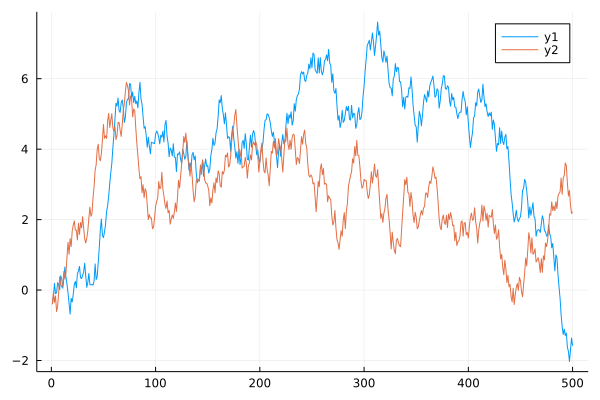

In [21]:
# Plotting
using Plots

# plot some series
p1=plot([cumsum(rand(500) .- 0.5), cumsum(rand(500) .- 0.5)])

In [22]:
# Save the plot
savefig(p1,"plots.svg")

In [23]:
# Data frames
Pkg.add("DataFrames")
Pkg.add("CSV")
Pkg.add("RData")
Pkg.add("RDatasets")
using DataFrames
using CSV
using RData
using RDatasets

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`


In [24]:
df = DataFrame(A = [1, 2], B = [ℯ, π], C = ["xx", "xy"])
show(df)

2×3 DataFrame
 Row │ A      B        C      
     │ Int64  Float64  String 
─────┼────────────────────────
   1 │     1  2.71828  xx
   2 │     2  3.14159  xy

In [25]:
# Reference a column using symbols
show(df[!,:A])

[1, 2]

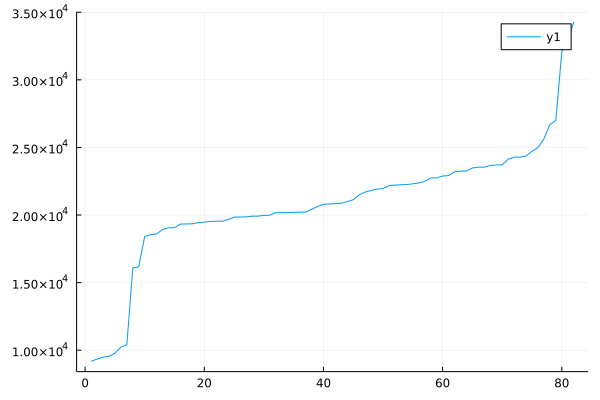

In [26]:
plot(dataset("MASS","galaxies")[!,:x1])

In [27]:
println(collect(RDatasets.datasets()[!,:Dataset]))

String31["affairs", "azdrg112", "azpro", "badhealth", "fasttrakg", "lbw", "lbwgrp", "loomis", "mdvis", "medpar", "rwm", "rwm5yr", "ships", "titanic", "titanicgrp", "Accident", "Airline", "Airq", "Benefits", "Bids", "BudgetFood", "BudgetItaly", "BudgetUK", "Bwages", "CPSch3", "Capm", "Car", "Caschool", "Catsup", "Cigar", "Cigarette", "Clothing", "Computers", "Cracker", "Crime", "DM", "Diamond", "Doctor", "DoctorAUS", "DoctorContacts", "Earnings", "Electricity", "Fair", "Fatality", "Fishing", "Forward", "FriendFoe", "Garch", "Gasoline", "Griliches", "Grunfeld", "HC", "HI", "Hdma", "Heating", "Hedonic", "Housing", "Icecream", "Journals", "Kakadu", "Ketchup", "Klein", "LaborSupply", "Labour", "MCAS", "Males", "Mathlevel", "MedExp", "Metal", "Mode", "ModeChoice", "Mofa", "Mroz", "MunExp", "NaturalPark", "Nerlove", "OFP", "Oil", "PSID", "Participation", "PatentsHGH", "PatentsRD", "Pound", "Produc", "RetSchool", "SP500", "Schooling", "Somerville", "Star", "Strike", "StrikeDur", "StrikeNb", "S

In [28]:
# Using Python tools
# python has a larger ecosystem

In [29]:
Pkg.add("PyCall")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`


In [30]:
using PyCall
Pkg.add("Colors")
using Colors
Pkg.add("ColorSchemes")
using ColorSchemes
Pkg.add("Plots")
using Plots
Pkg.add("FileIO")
using FileIO
Pkg.add("ImageIO")
using ImageIO
Pkg.add("ImageMagick")
using ImageMagick

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`


In [31]:
# conda install -c conda-forge earthengine-api
ee = pyimport("ee");

In [32]:
# earthengine authenticate
ee.Initialize();

In [33]:
dem = ee.Image("USGS/SRTMGL1_003");

In [34]:
xy = ee.Geometry.Point([86.9250, 27.9881]...);

In [35]:
elev = dem.sample(xy, 30).first().get("elevation").getInfo();

In [36]:
elev

8729

In [37]:
img = ee.Image("LANDSAT/LT05/C01/T1_SR/LT05_034033_20000913");

In [38]:
function ndvi(img)
    img.normalizedDifference(["B4","B3"]);
end

ndvi (generic function with 1 method)

In [39]:
ndvi_img = ndvi(img);

In [40]:
color_map = map(x -> hex(x,:RRGGBB), cgrad(:Greens_9));

In [41]:
thumburl = ndvi_img.getThumbUrl(
    # define parameters to visualize image
    Dict(
        "min" => 0,
        "max" => 0.8,
        "dimensions" => 1024,
        "format" => "png",
        "palette" => color_map
    )
);
localpath = download(thumburl);
img = FileIO.load(localpath);
plot(img, ticks = nothing, border = :none)

In [ ]:
# Working with types
# Julia can use types as a "variable" and
# "dispatch" on types instead of having conditionals.